In [1]:
import sys,os
folder_name="march_madness"
BASE_DIR=os.path.abspath(".").split(folder_name)[0]+folder_name
DATA_ROOT=os.path.join(BASE_DIR,"data")
#todo setup shared utilities folder
sys.path.insert(0, DATA_ROOT)

In [2]:
import pandas as pd
pd.options.display.max_rows=5#So we don't have to always write head
pd.options.display.max_columns=999
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import featuretools as ft

In [13]:
regular_season_results_df=pd.read_csv(DATA_ROOT+"/DataFiles/RegularSeasonDetailedResults.csv")
regular_season_results_df['game_type']='regular_season'
tourney_results=pd.read_csv(DATA_ROOT+"/DataFiles/NCAATourneyDetailedResults.csv")
tourney_results['game_type']='march_madness'
season_results=pd.concat([regular_season_results_df, tourney_results]).reset_index(drop=True)
season_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,game_type
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,regular_season
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,regular_season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83087,2018,152,1437,95,1242,79,N,0,36,65,18,40,5,7,7,26,20,10,3,5,14,28,62,7,21,16,20,10,23,8,9,5,1,12,march_madness
83088,2018,154,1437,79,1276,62,N,0,27,57,10,27,15,20,12,26,7,12,5,3,18,24,55,3,23,11,18,6,21,6,10,6,1,20,march_madness


In [14]:
seasons=pd.read_csv(DATA_ROOT+"/DataFiles/Seasons.csv").set_index("Season",drop=False)
seasons['DayZero']=pd.to_datetime(seasons['DayZero'])
seasons

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
Season,,,,,,
1985,1985,1984-10-29,East,West,Midwest,Southeast
1986,1986,1985-10-28,East,Midwest,Southeast,West
...,...,...,...,...,...,...
2018,2018,2017-10-30,East,Midwest,South,West
2019,2019,2018-11-05,TBD1,TBD2,TBD3,TBD4


In [15]:
teams=pd.read_csv(DATA_ROOT+"/DataFiles/Teams.csv")
team_conferences=pd.read_csv(DATA_ROOT+"/DataFiles/TeamConferences.csv")
tourney_seeds=pd.read_csv(DATA_ROOT+"/DataFiles/NCAATourneySeeds.csv")
tourney_seeds

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
...,...,...,...
2216,2018,Z16a,1300
2217,2018,Z16b,1411


In [16]:
from itertools import combinations
possible_matchups=[]
for c in combinations(sorted(teams['TeamID']),2):
    possible_matchups.append(c)
possible_matchups_df=pd.DataFrame(possible_matchups,columns=["team_1_id","team_2_id"]).astype(str)
possible_matchups_df['matchup_id']=possible_matchups_df['team_1_id']+"_"+possible_matchups_df['team_2_id']
possible_matchups_df

,team_1_id,team_2_id,matchup_id
0,1101,1102,1101_1102
1,1101,1103,1101_1103
...,...,...,...
66793,1464,1466,1464_1466
66794,1465,1466,1465_1466


In [20]:
season_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,game_type,game_index,game_datetime
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,regular_season,2003_10_1104_1328,2002-11-14
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,regular_season,2003_10_1272_1393,2002-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83087,2018,152,1437,95,1242,79,N,0,36,65,18,40,5,7,7,26,20,10,3,5,14,28,62,7,21,16,20,10,23,8,9,5,1,12,march_madness,2018_152_1242_1437,2018-03-31
83088,2018,154,1437,79,1276,62,N,0,27,57,10,27,15,20,12,26,7,12,5,3,18,24,55,3,23,11,18,6,21,6,10,6,1,20,march_madness,2018_154_1276_1437,2018-04-02


In [407]:
#prep regular season game_log same as tourney games
import datetime
def get_game_index(row):
    team_1_id,team_2_id=sorted([row['WTeamID'],row['LTeamID']])
    return "%s_%s_%s_%s"%(row['Season'],row['DayNum'],team_1_id,team_2_id)
def get_season_game_index(row):
    team_1_id,team_2_id=sorted([row['WTeamID'],row['LTeamID']])
    return "%s_%s_%s"%(row['Season'],team_1_id,team_2_id)
def get_game_daytime(row):
    #not an acutal "day". This uses Season and DayNum without a first day to index the day_num
    
    game_day=seasons.loc[row['Season']]['DayZero']+datetime.timedelta(days=row['DayNum'])
    return game_day
    
season_results['game_index']=season_results.apply(get_game_index, axis=1)
season_results['season_game_index']=season_results.apply(get_game_index, axis=1)
season_results['game_datetime']=pd.to_datetime(season_results.apply(get_game_daytime, axis=1))

def get_team_game_log(results_df,winner=True):
    team_game_log=season_results.copy()
    prefixes=["team_","opp_"]
    if not winner:
        prefixes=["opp_","team_"]
    rename_dict={}
    for col in season_results.columns:
        if col=="WLoc":
            continue
        elif col.startswith("W"):
            rename_dict[col]=prefixes[0]+col[1:]
        elif col.startswith("L") and col not in ["Loc"]:
            rename_dict[col]=prefixes[1]+col[1:]
    team_game_log=team_game_log.rename(columns=rename_dict)
    return team_game_log
winner_games=get_team_game_log(season_results, winner=True)
loser_games=get_team_game_log(season_results, winner=False)
team_game_log=pd.concat([winner_games,loser_games],sort=False)
team_game_log=team_game_log.sort_values(by=["Season","DayNum","game_index"])
team_game_log['team_margin']=team_game_log['team_Score']-team_game_log['opp_Score']
team_game_log['opp_margin']=-team_game_log['team_margin']
team_game_log['team_wins']=team_game_log['team_margin']>0
team_game_log['opp_wins']=~team_game_log['team_wins']
#teams can't tie in basketball, above code assumes that
assert(len(team_game_log[team_game_log['team_margin']==0])==0)
def get_game_loc(row):
    if row['team_wins']:
        return row['WLoc']
    else:
        if row['WLoc']=='H':
            return 'A'
        elif row['WLoc']=='A':
            return 'H'
        else:
            return row['WLoc']
def get_matchup_id(row):
    ids=sorted([row['team_TeamID'], row['opp_TeamID']])
    return "%s_%s"%tuple(ids)
team_game_log['team_game_loc']=team_game_log.apply(get_game_loc,axis=1)
del team_game_log['WLoc']
team_game_log['matchup_id']=team_game_log.apply(get_matchup_id , axis=1)
team_game_log['team_season_id']=team_game_log['Season'].astype(str)+"_"+team_game_log['team_TeamID'].astype(str)
team_game_log['opp_season_id']=team_game_log['Season'].astype(str)+"_"+team_game_log['opp_TeamID'].astype(str)
team_game_log['team_game_index']=team_game_log['game_index']+"_"+team_game_log['team_TeamID'].astype(str)
team_game_log['opp_game_index']=team_game_log['game_index']+"_"+team_game_log['team_TeamID'].astype(str)

In [408]:
#team_1 should always be the same team_1 with respect to a matchup_id
matchups=team_game_log.sort_values(by="team_game_index").groupby("game_index",as_index=False).first()
rename_dict={}
for c in matchups.columns:
    rename_dict[c]=c.replace("team_","team_1_").replace("opp_","team_2_")
matchups=matchups.rename(columns=rename_dict)
matchups=matchups[sorted(matchups.columns)].sort_values(by=["game_datetime"])
matchups

,DayNum,NumOT,Season,game_datetime,game_index,game_type,matchup_id,season_game_index,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_game_index,team_1_game_loc,team_1_margin,team_1_season_id,team_1_wins,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID,team_2_game_index,team_2_margin,team_2_season_id,team_2_wins
417,10,0,2003,2002-11-14,2003_10_1272_1393,regular_season,1272_1393,2003_10_1272_1393,16,4,28,62,20,26,8,19,10,15,18,70,4,13,1272,2003_10_1272_1393_1272,N,7,2003_1272,True,7,6,25,67,24,24,6,20,9,20,16,63,8,12,1393,2003_10_1272_1393_1272,-7,2003_1393,False
416,10,0,2003,2002-11-14,2003_10_1104_1328,regular_season,1104_1328,2003_10_1104_1328,13,1,24,58,14,27,3,18,11,14,22,68,7,23,1104,2003_10_1104_1328_1104,N,6,2003_1104,True,8,2,22,53,10,22,2,22,16,10,20,62,9,18,1328,2003_10_1104_1328_1104,-6,2003_1328,False
908,11,0,2003,2002-11-15,2003_11_1186_1458,regular_season,1186_1458,2003_11_1186_1458,8,3,22,46,11,20,3,17,12,6,25,55,4,19,1186,2003_11_1186_1458_1186,A,-26,2003_1186,False,12,3,24,57,12,26,6,27,23,12,18,81,9,9,1458,2003_11_1186_1458_1186,26,2003_1458,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79388,152,0,2018,2018-03-31,2018_152_1260_1276,march_madness,1260_1276,2018_152_1260_1276,6,1,26,51,10,22,1,14,12,6,17,57,5,17,1260,2018_152_1260_1276_1260,N,-12,2018_1260,False,8,2,25,59,28,25,7,18,12,11,11,69,10,11,1276,2018_152_1260_1276_1260,12,2018_1276,True
79387,152,0,2018,2018-03-31,2018_152_1242_1437,march_madness,1242_1437,2018_152_1242_1437,8,1,23,62,21,28,7,20,16,10,12,79,5,9,1242,2018_152_1242_1437_1242,N,-16,2018_1242,False,20,5,26,65,40,36,18,7,5,7,14,95,3,10,1437,2018_152_1242_1437_1242,16,2018_1437,True
79389,154,0,2018,2018-04-02,2018_154_1276_1437,march_madness,1276_1437,2018_154_1276_1437,6,1,21,55,23,24,3,18,11,6,20,62,6,10,1276,2018_154_1276_1437_1276,N,-17,2018_1276,False,7,3,26,57,27,27,10,20,15,12,18,79,5,12,1437,2018_154_1276_1437_1276,17,2018_1437,True


In [409]:
matchups.columns

Index(['DayNum', 'NumOT', 'Season', 'game_datetime', 'game_index', 'game_type',
       'matchup_id', 'season_game_index', 'team_1_Ast', 'team_1_Blk',
       'team_1_DR', 'team_1_FGA', 'team_1_FGA3', 'team_1_FGM', 'team_1_FGM3',
       'team_1_FTA', 'team_1_FTM', 'team_1_OR', 'team_1_PF', 'team_1_Score',
       'team_1_Stl', 'team_1_TO', 'team_1_TeamID', 'team_1_game_index',
       'team_1_game_loc', 'team_1_margin', 'team_1_season_id', 'team_1_wins',
       'team_2_Ast', 'team_2_Blk', 'team_2_DR', 'team_2_FGA', 'team_2_FGA3',
       'team_2_FGM', 'team_2_FGM3', 'team_2_FTA', 'team_2_FTM', 'team_2_OR',
       'team_2_PF', 'team_2_Score', 'team_2_Stl', 'team_2_TO', 'team_2_TeamID',
       'team_2_game_index', 'team_2_margin', 'team_2_season_id',
       'team_2_wins'],
      dtype='object')

In [410]:
#get rid of duplicate information here
matchups=matchups[
    ['game_datetime', 'game_index', 'game_type',
       'matchup_id','team_1_season_id','team_2_season_id',
    'team_1_Ast', 'team_1_Blk', 'team_1_DR', 'team_1_FGA',
       'team_1_FGA3', 'team_1_FGM', 'team_1_FGM3', 'team_1_FTA', 'team_1_FTM',
       'team_1_OR', 'team_1_PF', 'team_1_Score', 'team_1_Stl', 'team_1_TO',
       'team_1_TeamID',  'team_1_margin','team_1_game_loc',
        'team_1_wins', 'team_2_Ast', 'team_2_Blk',
       'team_2_DR', 'team_2_FGA', 'team_2_FGA3', 'team_2_FGM', 'team_2_FGM3',
       'team_2_FTA', 'team_2_FTM', 'team_2_OR', 'team_2_PF', 'team_2_Score',
       'team_2_Stl', 'team_2_TO', 'team_2_TeamID', 
       ]
]

In [411]:
matchups

,game_datetime,game_index,game_type,matchup_id,team_1_season_id,team_2_season_id,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_margin,team_1_game_loc,team_1_wins,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID
417,2002-11-14,2003_10_1272_1393,regular_season,1272_1393,2003_1272,2003_1393,16,4,28,62,20,26,8,19,10,15,18,70,4,13,1272,7,N,True,7,6,25,67,24,24,6,20,9,20,16,63,8,12,1393
416,2002-11-14,2003_10_1104_1328,regular_season,1104_1328,2003_1104,2003_1328,13,1,24,58,14,27,3,18,11,14,22,68,7,23,1104,6,N,True,8,2,22,53,10,22,2,22,16,10,20,62,9,18,1328
908,2002-11-15,2003_11_1186_1458,regular_season,1186_1458,2003_1186,2003_1458,8,3,22,46,11,20,3,17,12,6,25,55,4,19,1186,-26,A,False,12,3,24,57,12,26,6,27,23,12,18,81,9,9,1458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79388,2018-03-31,2018_152_1260_1276,march_madness,1260_1276,2018_1260,2018_1276,6,1,26,51,10,22,1,14,12,6,17,57,5,17,1260,-12,N,False,8,2,25,59,28,25,7,18,12,11,11,69,10,11,1276
79387,2018-03-31,2018_152_1242_1437,march_madness,1242_1437,2018_1242,2018_1437,8,1,23,62,21,28,7,20,16,10,12,79,5,9,1242,-16,N,False,20,5,26,65,40,36,18,7,5,7,14,95,3,10,1437
79389,2018-04-02,2018_154_1276_1437,march_madness,1276_1437,2018_1276,2018_1437,6,1,21,55,23,24,3,18,11,6,20,62,6,10,1276,-17,N,False,7,3,26,57,27,27,10,20,15,12,18,79,5,12,1437


In [412]:
matchups['season']=matchups['team_1_season_id'].apply(lambda x: int(x.split("_")[0]))

In [413]:
matchups['game_end']=matchups['game_datetime']+pd.Timedelta("1 day")
matchups

,game_datetime,game_index,game_type,matchup_id,team_1_season_id,team_2_season_id,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_margin,team_1_game_loc,team_1_wins,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID,season,game_end
417,2002-11-14,2003_10_1272_1393,regular_season,1272_1393,2003_1272,2003_1393,16,4,28,62,20,26,8,19,10,15,18,70,4,13,1272,7,N,True,7,6,25,67,24,24,6,20,9,20,16,63,8,12,1393,2003,2002-11-15
416,2002-11-14,2003_10_1104_1328,regular_season,1104_1328,2003_1104,2003_1328,13,1,24,58,14,27,3,18,11,14,22,68,7,23,1104,6,N,True,8,2,22,53,10,22,2,22,16,10,20,62,9,18,1328,2003,2002-11-15
908,2002-11-15,2003_11_1186_1458,regular_season,1186_1458,2003_1186,2003_1458,8,3,22,46,11,20,3,17,12,6,25,55,4,19,1186,-26,A,False,12,3,24,57,12,26,6,27,23,12,18,81,9,9,1458,2003,2002-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79388,2018-03-31,2018_152_1260_1276,march_madness,1260_1276,2018_1260,2018_1276,6,1,26,51,10,22,1,14,12,6,17,57,5,17,1260,-12,N,False,8,2,25,59,28,25,7,18,12,11,11,69,10,11,1276,2018,2018-04-01
79387,2018-03-31,2018_152_1242_1437,march_madness,1242_1437,2018_1242,2018_1437,8,1,23,62,21,28,7,20,16,10,12,79,5,9,1242,-16,N,False,20,5,26,65,40,36,18,7,5,7,14,95,3,10,1437,2018,2018-04-01
79389,2018-04-02,2018_154_1276_1437,march_madness,1276_1437,2018_1276,2018_1437,6,1,21,55,23,24,3,18,11,6,20,62,6,10,1276,-17,N,False,7,3,26,57,27,27,10,20,15,12,18,79,5,12,1437,2018,2018-04-03


In [414]:
matchups.columns

Index(['game_datetime', 'game_index', 'game_type', 'matchup_id',
       'team_1_season_id', 'team_2_season_id', 'team_1_Ast', 'team_1_Blk',
       'team_1_DR', 'team_1_FGA', 'team_1_FGA3', 'team_1_FGM', 'team_1_FGM3',
       'team_1_FTA', 'team_1_FTM', 'team_1_OR', 'team_1_PF', 'team_1_Score',
       'team_1_Stl', 'team_1_TO', 'team_1_TeamID', 'team_1_margin',
       'team_1_game_loc', 'team_1_wins', 'team_2_Ast', 'team_2_Blk',
       'team_2_DR', 'team_2_FGA', 'team_2_FGA3', 'team_2_FGM', 'team_2_FGM3',
       'team_2_FTA', 'team_2_FTM', 'team_2_OR', 'team_2_PF', 'team_2_Score',
       'team_2_Stl', 'team_2_TO', 'team_2_TeamID', 'season', 'game_end'],
      dtype='object')

In [415]:
del matchups_es

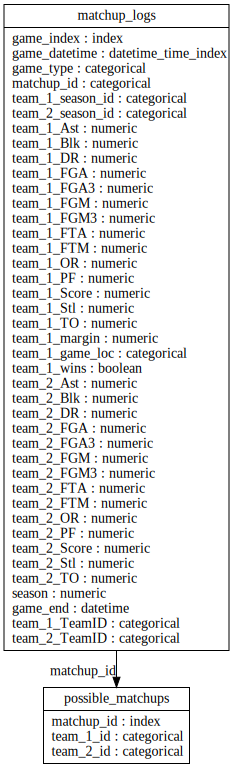

In [449]:
matchups_es = ft.EntitySet()
matchups_es = matchups_es.entity_from_dataframe(entity_id="possible_matchups",
                             dataframe=possible_matchups_df,
                              index="matchup_id"
                             )
matchups_es = matchups_es.entity_from_dataframe(entity_id="matchup_logs",
                            dataframe=matchups,
                            index="game_index",
                            time_index="game_datetime",
                            variable_types={
                                "team_1_TeamID": ft.variable_types.Categorical,
                                "team_2_TeamID": ft.variable_types.Categorical
                            },
                            secondary_time_index={
                                "game_end": 
                                  [ 'team_1_Ast', 'team_1_Blk', 'team_1_DR', 'team_1_FGA',
                                   'team_1_FGA3', 'team_1_FGM', 'team_1_FGM3', 'team_1_FTA', 'team_1_FTM',
                                   'team_1_OR', 'team_1_PF', 'team_1_Score', 'team_1_Stl', 'team_1_TO',
                                   'team_1_TeamID',  'team_1_margin',
                                    'team_1_wins', 'team_2_Ast', 'team_2_Blk',
                                   'team_2_DR', 'team_2_FGA', 'team_2_FGA3', 'team_2_FGM', 'team_2_FGM3',
                                   'team_2_FTA', 'team_2_FTM', 'team_2_OR', 'team_2_PF', 'team_2_Score',
                                   'team_2_Stl', 'team_2_TO', 'team_2_TeamID', 
                                    ]}
                             )
matchups_es.add_relationship(ft.Relationship(
    matchups_es['possible_matchups']['matchup_id'],
    matchups_es['matchup_logs']['matchup_id']
    
    )
)

matchups_es.plot()

In [417]:
matchups_es["matchup_logs"]["team_1_wins"].interesting_values = [False, True]

matchups_es["matchup_logs"]["game_type"].interesting_values = ["regular_season", "march_madness"]

In [418]:
matchup_logs=matchups_es['matchup_logs'].df
tourney_starts=matchup_logs[matchup_logs['game_type']=='march_madness'].groupby("season").first()['game_datetime']
tourney_starts

season
2003   2003-03-18
2004   2004-03-16
2005   2005-03-15
          ...    
2016   2016-03-15
2017   2017-03-14
2018   2018-03-13
Name: game_datetime, Length: 16, dtype: datetime64[ns]

In [419]:
def make_tourney_labels():
    matchup_logs = matchups_es["matchup_logs"].df

    time_variable="game_end"
    full_training_data = pd.DataFrame()
    valid_prediction_data = pd.DataFrame()
    for season, tourney_start in tourney_starts.iteritems():
        training_data=matchup_logs[(matchup_logs["game_end"] <= tourney_start) & (matchup_logs["season"]==season)]
        full_training_data=full_training_data.append(training_data)

        prediction_data=matchup_logs[(matchup_logs["game_end"] > tourney_start) & (matchup_logs["season"]==season)]
        valid_prediction_data=prediction_data[prediction_data['matchup_id'].isin(full_training_data['matchup_id'])]
        valid_prediction_data=valid_prediction_data.append(valid_prediction_data)
        extra_cols=['team_1_wins']#, 'team_2_wins',"matchup_id"]
    
    labels = valid_pred_data[["game_index","game_datetime",]+extra_cols]
    labels["time"] = labels['game_datetime']
    labels = labels[["game_index", "time"]+extra_cols]

    return labels.reset_index(drop=True)
def make_day_of_labels(es, training_window, cutoff_time,
                prediction_window):

    prediction_window_end = cutoff_time + prediction_window
    t_start = cutoff_time - training_window

    matchup_logs = es["matchup_logs"].df
    
    time_index="game_datetime"
    training_data = matchup_logs[(matchup_logs[time_index] <= cutoff_time) & (matchup_logs[time_index] > t_start)]
    prediction_data = matchup_logs[(matchup_logs[time_index] > cutoff_time) & (matchup_logs[time_index] < prediction_window_end)]
    
    matchup_ids_in_training = training_data['matchup_id'].unique()
    valid_pred_data = prediction_data[prediction_data['matchup_id'].isin(matchup_ids_in_training)]
    extra_cols=['team_1_wins']
    labels = valid_pred_data[["game_index","game_datetime",]+extra_cols]
    labels["time"] = labels['game_datetime']
    del labels['game_datetime']
    labels = labels[["game_index", "time",]+extra_cols]

    return labels.reset_index(drop=True)
tourney_labels=make_tourney_labels()
tourney_labels[tourney_labels['game_index']=='2016_145_1242_1437']

,game_index,time,team_1_wins
907,2016_145_1242_1437,2016-03-26,False


In [420]:

day_of_labels=make_day_of_labels(matchups_es, 
    cutoff_time = pd.Timestamp('February 3, 2003'),
                                prediction_window = ft.Timedelta("5 weeks"),
                                training_window = ft.Timedelta("12 weeks")
           )

In [421]:
pd.options.display.max_rows=6
matchup_logs[matchup_logs['matchup_id']=='1242_1437']

,game_index,game_datetime,game_type,matchup_id,team_1_season_id,team_2_season_id,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_margin,team_1_game_loc,team_1_wins,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID,season,game_end
2004_60_1242_1437,2004_60_1242_1437,2004-01-02,regular_season,1242_1437,2004_1242,2004_1437,17,7,27,51,11,23,5,41,35,8,24,86,6,15,1242,7,H,True,19,3,23,67,35,25,13,19,16,18,32,79,8,18,1437,2004,2004-01-03
2005_82_1242_1437,2005_82_1242_1437,2005-01-22,regular_season,1242_1437,2005_1242,2005_1437,15,7,18,55,17,24,7,12,7,14,14,62,5,22,1242,-21,A,False,10,6,18,55,19,28,12,16,15,10,15,83,15,15,1437,2005,2005-01-23
2008_144_1242_1437,2008_144_1242_1437,2008-03-28,march_madness,1242_1437,2008_1242,2008_1437,16,5,26,45,19,24,8,20,16,7,18,72,8,18,1242,15,N,True,5,2,15,59,17,21,3,18,12,15,17,57,10,14,1437,2008,2008-03-29
2014_25_1242_1437,2014_25_1242_1437,2013-11-29,regular_season,1242_1437,2014_1242,2014_1437,9,4,25,54,11,21,2,25,15,9,23,59,9,16,1242,-4,N,False,13,2,30,52,25,18,9,29,18,13,23,63,8,16,1437,2014,2013-11-30
2016_145_1242_1437,2016_145_1242_1437,2016-03-26,march_madness,1242_1437,2016_1242,2016_1437,11,2,26,50,22,23,6,11,7,6,19,59,5,16,1242,-5,N,False,7,2,23,52,18,21,4,19,18,5,16,64,11,9,1437,2016,2016-03-27
2018_152_1242_1437,2018_152_1242_1437,2018-03-31,march_madness,1242_1437,2018_1242,2018_1437,8,1,23,62,21,28,7,20,16,10,12,79,5,9,1242,-16,N,False,20,5,26,65,40,36,18,7,5,7,14,95,3,10,1437,2018,2018-04-01


In [356]:
#tourney_labels=tourney_labels[tourney_labels['game_index']=='2016_145_1242_1437']
tourney_labels

,game_index,time,team_1_wins
0,2003_134_1411_1421,2003-03-18,False
1,2003_136_1112_1436,2003-03-20,True
2,2003_136_1113_1272,2003-03-20,True
...,...,...,...
1045,2018_152_1242_1437,2018-03-31,False
1046,2018_152_1260_1276,2018-03-31,False
1047,2018_154_1276_1437,2018-04-02,False


In [357]:
matchup_logs.loc[["2016_145_1242_1437"]]

,game_index,game_datetime,game_type,matchup_id,team_1_season_id,team_2_season_id,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_margin,team_1_game_loc,team_1_wins,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID,game_end,season
2016_145_1242_1437,2016_145_1242_1437,2016-03-26,march_madness,1242_1437,2016_1242,2016_1437,11,2,26,50,22,23,6,11,7,6,19,59,5,16,1242,-5,N,False,7,2,23,52,18,21,4,19,18,5,16,64,11,9,1437,2016-03-27,2016


In [359]:
matchups_es['matchup_logs'].last_time_index=matchups_es['matchup_logs'].df['game_end']

In [372]:
labels=tourney_labels
feature_matrix, features = ft.dfs(target_entity="matchup_logs", 
                                  cutoff_time=labels,
                                  training_window=ft.Timedelta("16 years"),
                                  entityset=matchups_es,
                                  cutoff_time_in_index=True
                                 )
# encode categorical values
fm_encoded, features_encoded = ft.encode_features(feature_matrix,
                                                  features)

print("Number of features %s" % len(features_encoded))
fm_encoded

Number of features 356


,,game_type = march_madness,game_type is unknown,matchup_id = 1314_1437,matchup_id = 1196_1417,matchup_id = 1277_1314,matchup_id = 1257_1277,matchup_id = 1246_1458,matchup_id = 1246_1452,matchup_id = 1242_1437,matchup_id = 1242_1314,matchup_id = 1181_1277,matchup_id = 1163_1246,matchup_id is unknown,team_1_season_id = 2017_1211,team_1_season_id = 2015_1181,team_1_season_id = 2014_1163,team_1_season_id = 2011_1139,team_1_season_id = 2010_1139,team_1_season_id = 2006_1196,team_1_season_id = 2012_1242,team_1_season_id = 2008_1272,team_1_season_id = 2008_1242,team_1_season_id = 2007_1196,team_1_season_id is unknown,team_2_season_id = 2016_1437,team_2_season_id = 2015_1458,team_2_season_id = 2011_1433,team_2_season_id = 2006_1417,team_2_season_id = 2018_1437,team_2_season_id = 2017_1376,team_2_season_id = 2014_1458,team_2_season_id = 2013_1455,team_2_season_id = 2013_1393,team_2_season_id = 2010_1452,team_2_season_id is unknown,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_margin,team_1_game_loc = N,team_1_game_loc is unknown,team_1_wins,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID,season,DAY(game_datetime) = 18,DAY(game_datetime) = 20,DAY(game_datetime) = 19,DAY(game_datetime) = 17,DAY(game_datetime) = 21,DAY(game_datetime) = 16,DAY(game_datetime) = 22,DAY(game_datetime) = 15,DAY(game_datetime) = 23,DAY(game_datetime) = 24,DAY(game_datetime) is unknown,DAY(game_end) is unknown,YEAR(game_datetime) = 2018,YEAR(game_datetime) = 2017,YEAR(game_datetime) = 2016,YEAR(game_datetime) = 2015,YEAR(game_datetime) = 2014,YEAR(game_datetime) = 2013,YEAR(game_datetime) = 2012,YEAR(game_datetime) = 2011,YEAR(game_datetime) = 2010,YEAR(game_datetime) = 2009,YEAR(game_datetime) is unknown,YEAR(game_end) is unknown,MONTH(game_datetime) = 3,MONTH(game_datetime) = 4,MONTH(game_datetime) is unknown,MONTH(game_end) is unknown,WEEKDAY(game_datetime) = 4,WEEKDAY(game_datetime) = 3,WEEKDAY(game_datetime) = 5,WEEKDAY(game_datetime) = 6,WEEKDAY(game_datetime) = 1,WEEKDAY(game_datetime) = 2,WEEKDAY(game_datetime) = 0,WEEKDAY(game_datetime) is unknown,WEEKDAY(game_end) is unknown,possible_matchups.team_1_id = 1242,possible_matchups.team_1_id = 1181,possible_matchups.team_1_id = 1112,possible_matchups.team_1_id = 1196,possible_matchups.team_1_id = 1211,possible_matchups.team_1_id = 1139,possible_matchups.team_1_id = 1246,possible_matchups.team_1_id = 1163,possible_matchups.team_1_id = 1257,possible_matchups.team_1_id = 1314,possible_matchups.team_1_id is unknown,possible_matchups.team_2_id = 1458,possible_matchups.team_2_id = 1462,possible_matchups.team_2_id = 1437,possible_matchups.team_2_id = 1314,possible_matchups.team_2_id = 1393,possible_matchups.team_2_id = 1452,possible_matchups.team_2_id = 1417,possible_matchups.team_2_id = 1277,possible_matchups.team_2_id = 1400,possible_matchups.team_2_id = 1246,possible_matchups.team_2_id is unknown,possible_matchups.SUM(matchup_logs.team_1_Ast),possible_matchups.SUM(matchup_logs.team_1_Blk),possible_matchups.SUM(matchup_logs.team_1_DR),possible_matchups.SUM(matchup_logs.team_1_FGA),possible_matchups.SUM(matchup_logs.team_1_FGA3),possible_matchups.SUM(matchup_logs.team_1_FGM),possible_matchups.SUM(matchup_logs.team_1_FGM3),possible_matchups.SUM(matchup_logs.team_1_FTA),possible_matchups.SUM(matchup_logs.team_1_FTM),possible_matchups.SUM(matchup_logs.team_1_OR),possible_matchups.SUM(matchup_logs.team_1_PF),possible_matchups.SUM(matchup_logs.team_1_Score),possible_matchups.SUM(matchup_logs.team_1_Stl),possible_matchups.SUM(matchup_logs.team_1_TO),possible_matchups.SUM(matchup_logs.team_1_TeamID),possible_matchups.SUM(matchup_logs.team_1_margin),possible_matchups.SUM(matchup_logs.team_2_Ast),possible_matchups.SUM(matchup_logs.team_2_Blk),possible_matchups.SUM(matchup_logs

In [391]:
matchup_logs[matchup_logs['matchup_id']=='1242_1437'].iloc[:5].mean()['team_1_Score']

67.6

In [392]:
fm_encoded.loc[["2016_145_1242_1437"]]

,,game_type = march_madness,game_type is unknown,matchup_id = 1314_1437,matchup_id = 1196_1417,matchup_id = 1277_1314,matchup_id = 1257_1277,matchup_id = 1246_1458,matchup_id = 1246_1452,matchup_id = 1242_1437,matchup_id = 1242_1314,matchup_id = 1181_1277,matchup_id = 1163_1246,matchup_id is unknown,team_1_season_id = 2017_1211,team_1_season_id = 2015_1181,team_1_season_id = 2014_1163,team_1_season_id = 2011_1139,team_1_season_id = 2010_1139,team_1_season_id = 2006_1196,team_1_season_id = 2012_1242,team_1_season_id = 2008_1272,team_1_season_id = 2008_1242,team_1_season_id = 2007_1196,team_1_season_id is unknown,team_2_season_id = 2016_1437,team_2_season_id = 2015_1458,team_2_season_id = 2011_1433,team_2_season_id = 2006_1417,team_2_season_id = 2018_1437,team_2_season_id = 2017_1376,team_2_season_id = 2014_1458,team_2_season_id = 2013_1455,team_2_season_id = 2013_1393,team_2_season_id = 2010_1452,team_2_season_id is unknown,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_margin,team_1_game_loc = N,team_1_game_loc is unknown,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID,season,DAY(game_datetime) = 18,DAY(game_datetime) = 20,DAY(game_datetime) = 19,DAY(game_datetime) = 17,DAY(game_datetime) = 21,DAY(game_datetime) = 16,DAY(game_datetime) = 22,DAY(game_datetime) = 15,DAY(game_datetime) = 23,DAY(game_datetime) = 24,DAY(game_datetime) is unknown,DAY(game_end) is unknown,YEAR(game_datetime) = 2018,YEAR(game_datetime) = 2017,YEAR(game_datetime) = 2016,YEAR(game_datetime) = 2015,YEAR(game_datetime) = 2014,YEAR(game_datetime) = 2013,YEAR(game_datetime) = 2012,YEAR(game_datetime) = 2011,YEAR(game_datetime) = 2010,YEAR(game_datetime) = 2009,YEAR(game_datetime) is unknown,YEAR(game_end) is unknown,MONTH(game_datetime) = 3,MONTH(game_datetime) = 4,MONTH(game_datetime) is unknown,MONTH(game_end) is unknown,WEEKDAY(game_datetime) = 4,WEEKDAY(game_datetime) = 3,WEEKDAY(game_datetime) = 5,WEEKDAY(game_datetime) = 6,WEEKDAY(game_datetime) = 1,WEEKDAY(game_datetime) = 2,WEEKDAY(game_datetime) = 0,WEEKDAY(game_datetime) is unknown,WEEKDAY(game_end) is unknown,possible_matchups.team_1_id = 1242,possible_matchups.team_1_id = 1181,possible_matchups.team_1_id = 1112,possible_matchups.team_1_id = 1196,possible_matchups.team_1_id = 1211,possible_matchups.team_1_id = 1139,possible_matchups.team_1_id = 1246,possible_matchups.team_1_id = 1163,possible_matchups.team_1_id = 1257,possible_matchups.team_1_id = 1314,possible_matchups.team_1_id is unknown,possible_matchups.team_2_id = 1458,possible_matchups.team_2_id = 1462,possible_matchups.team_2_id = 1437,possible_matchups.team_2_id = 1314,possible_matchups.team_2_id = 1393,possible_matchups.team_2_id = 1452,possible_matchups.team_2_id = 1417,possible_matchups.team_2_id = 1277,possible_matchups.team_2_id = 1400,possible_matchups.team_2_id = 1246,possible_matchups.team_2_id is unknown,possible_matchups.SUM(matchup_logs.team_1_Ast),possible_matchups.SUM(matchup_logs.team_1_Blk),possible_matchups.SUM(matchup_logs.team_1_DR),possible_matchups.SUM(matchup_logs.team_1_FGA),possible_matchups.SUM(matchup_logs.team_1_FGA3),possible_matchups.SUM(matchup_logs.team_1_FGM),possible_matchups.SUM(matchup_logs.team_1_FGM3),possible_matchups.SUM(matchup_logs.team_1_FTA),possible_matchups.SUM(matchup_logs.team_1_FTM),possible_matchups.SUM(matchup_logs.team_1_OR),possible_matchups.SUM(matchup_logs.team_1_PF),possible_matchups.SUM(matchup_logs.team_1_Score),possible_matchups.SUM(matchup_logs.team_1_Stl),possible_matchups.SUM(matchup_logs.team_1_TO),possible_matchups.SUM(matchup_logs.team_1_TeamID),possible_matchups.SUM(matchup_logs.team_1_margin),possible_matchups.SUM(matchup_logs.team_2_Ast),possible_matchups.SUM(matchup_logs.team_2_Blk),possible_matchups.SUM(matchup_logs.team_2_DR),

# Machine Learning

In [394]:
X = fm_encoded.reset_index().merge(labels, on=["game_index","time"])

X.drop(["game_index", "time"], axis=1, inplace=True)
X = X.fillna(0)
y = X.pop("team_1_wins")
X

,game_type = march_madness,game_type is unknown,matchup_id = 1314_1437,matchup_id = 1196_1417,matchup_id = 1277_1314,matchup_id = 1257_1277,matchup_id = 1246_1458,matchup_id = 1246_1452,matchup_id = 1242_1437,matchup_id = 1242_1314,matchup_id = 1181_1277,matchup_id = 1163_1246,matchup_id is unknown,team_1_season_id = 2017_1211,team_1_season_id = 2015_1181,team_1_season_id = 2014_1163,team_1_season_id = 2011_1139,team_1_season_id = 2010_1139,team_1_season_id = 2006_1196,team_1_season_id = 2012_1242,team_1_season_id = 2008_1272,team_1_season_id = 2008_1242,team_1_season_id = 2007_1196,team_1_season_id is unknown,team_2_season_id = 2016_1437,team_2_season_id = 2015_1458,team_2_season_id = 2011_1433,team_2_season_id = 2006_1417,team_2_season_id = 2018_1437,team_2_season_id = 2017_1376,team_2_season_id = 2014_1458,team_2_season_id = 2013_1455,team_2_season_id = 2013_1393,team_2_season_id = 2010_1452,team_2_season_id is unknown,team_1_Ast,team_1_Blk,team_1_DR,team_1_FGA,team_1_FGA3,team_1_FGM,team_1_FGM3,team_1_FTA,team_1_FTM,team_1_OR,team_1_PF,team_1_Score,team_1_Stl,team_1_TO,team_1_TeamID,team_1_margin,team_1_game_loc = N,team_1_game_loc is unknown,team_2_Ast,team_2_Blk,team_2_DR,team_2_FGA,team_2_FGA3,team_2_FGM,team_2_FGM3,team_2_FTA,team_2_FTM,team_2_OR,team_2_PF,team_2_Score,team_2_Stl,team_2_TO,team_2_TeamID,season,DAY(game_datetime) = 18,DAY(game_datetime) = 20,DAY(game_datetime) = 19,DAY(game_datetime) = 17,DAY(game_datetime) = 21,DAY(game_datetime) = 16,DAY(game_datetime) = 22,DAY(game_datetime) = 15,DAY(game_datetime) = 23,DAY(game_datetime) = 24,DAY(game_datetime) is unknown,DAY(game_end) is unknown,YEAR(game_datetime) = 2018,YEAR(game_datetime) = 2017,YEAR(game_datetime) = 2016,YEAR(game_datetime) = 2015,YEAR(game_datetime) = 2014,YEAR(game_datetime) = 2013,YEAR(game_datetime) = 2012,YEAR(game_datetime) = 2011,YEAR(game_datetime) = 2010,YEAR(game_datetime) = 2009,YEAR(game_datetime) is unknown,YEAR(game_end) is unknown,MONTH(game_datetime) = 3,MONTH(game_datetime) = 4,MONTH(game_datetime) is unknown,MONTH(game_end) is unknown,WEEKDAY(game_datetime) = 4,WEEKDAY(game_datetime) = 3,WEEKDAY(game_datetime) = 5,WEEKDAY(game_datetime) = 6,WEEKDAY(game_datetime) = 1,WEEKDAY(game_datetime) = 2,WEEKDAY(game_datetime) = 0,WEEKDAY(game_datetime) is unknown,WEEKDAY(game_end) is unknown,possible_matchups.team_1_id = 1242,possible_matchups.team_1_id = 1181,possible_matchups.team_1_id = 1112,possible_matchups.team_1_id = 1196,possible_matchups.team_1_id = 1211,possible_matchups.team_1_id = 1139,possible_matchups.team_1_id = 1246,possible_matchups.team_1_id = 1163,possible_matchups.team_1_id = 1257,possible_matchups.team_1_id = 1314,possible_matchups.team_1_id is unknown,possible_matchups.team_2_id = 1458,possible_matchups.team_2_id = 1462,possible_matchups.team_2_id = 1437,possible_matchups.team_2_id = 1314,possible_matchups.team_2_id = 1393,possible_matchups.team_2_id = 1452,possible_matchups.team_2_id = 1417,possible_matchups.team_2_id = 1277,possible_matchups.team_2_id = 1400,possible_matchups.team_2_id = 1246,possible_matchups.team_2_id is unknown,possible_matchups.SUM(matchup_logs.team_1_Ast),possible_matchups.SUM(matchup_logs.team_1_Blk),possible_matchups.SUM(matchup_logs.team_1_DR),possible_matchups.SUM(matchup_logs.team_1_FGA),possible_matchups.SUM(matchup_logs.team_1_FGA3),possible_matchups.SUM(matchup_logs.team_1_FGM),possible_matchups.SUM(matchup_logs.team_1_FGM3),possible_matchups.SUM(matchup_logs.team_1_FTA),possible_matchups.SUM(matchup_logs.team_1_FTM),possible_matchups.SUM(matchup_logs.team_1_OR),possible_matchups.SUM(matchup_logs.team_1_PF),possible_matchups.SUM(matchup_logs.team_1_Score),possible_matchups.SUM(matchup_logs.team_1_Stl),possible_matchups.SUM(matchup_logs.team_1_TO),possible_matchups.SUM(matchup_logs.team_1_TeamID),possible_matchups.SUM(matchup_logs.team_1_margin),possible_matchups.SUM(matchup_logs.team_2_Ast),possible_matchups.SUM(matchup_logs.team_2_Blk),possible_matchups.SUM(matchup_logs.team_2_DR),p

In [379]:
X['possible_matchups.MODE(matchup_logs.team_1_game_loc) = N'].value_counts()

1    922
0    126
Name: possible_matchups.MODE(matchup_logs.team_1_game_loc) = N, dtype: int64

In [380]:
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
clf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
scores = cross_val_score(estimator=clf,X=X, y=y, cv=3,
                         scoring="roc_auc", verbose=True)

"AUC %.2f +/- %.2f" % (scores.mean(), scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s finished


'AUC 0.67 +/- 0.04'

In [381]:
from sklearn.model_selection import train_test_split
clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=23)

clf.fit(X_train, y_train, )
import utils
from importlib import reload
reload(utils)
top_features = utils.feature_importances(clf, X.columns, n=20)

y_hat_train=clf.predict_proba(X_train)[:,1]
y_hat_test=clf.predict_proba(X_test)[:,1]
print()
print("Log Loss")
print("TRAIN:",log_loss(y_train,y_hat_train))
print("TEST:",log_loss(y_test,y_hat_test))
print()
print("Accuracy")
print("TRAIN:",accuracy_score(y_train, clf.predict(X_train)))
print("TEST:",accuracy_score(y_test, clf.predict(X_test)))

1: Feature: possible_matchups.team_1_id is unknown, 0.053
2: Feature: team_1_season_id is unknown, 0.041
3: Feature: possible_matchups.team_2_id is unknown, 0.027
4: Feature: possible_matchups.MIN(matchup_logs.team_2_TeamID), 0.026
5: Feature: possible_matchups.team_1_id = 1196, 0.022
6: Feature: possible_matchups.SUM(matchup_logs.team_1_margin), 0.022
7: Feature: possible_matchups.MAX(matchup_logs.team_1_margin), 0.022
8: Feature: possible_matchups.STD(matchup_logs.team_1_FTA), 0.018
9: Feature: possible_matchups.STD(matchup_logs.team_1_FTM), 0.018
10: Feature: possible_matchups.MAX(matchup_logs.team_2_TeamID), 0.017
11: Feature: possible_matchups.MEAN(matchup_logs.team_2_TeamID), 0.015
12: Feature: possible_matchups.MEAN(matchup_logs.team_2_FTA), 0.014
13: Feature: possible_matchups.MEAN(matchup_logs.team_1_PF), 0.013
14: Feature: possible_matchups.MODE(matchup_logs.team_1_season_id) is unknown, 0.013
15: Feature: possible_matchups.MEAN(matchup_logs.team_1_Blk), 0.012
16: Feature: po

In [438]:
def game_index_to_kaggle_id(game_index):
    vals=game_index.split("_")
    vals.pop(1)
    return "_".join(vals)
labels['ID']=labels['game_index'].apply(game_index_to_kaggle_id)
labels['Pred']=clf.predict_proba(X)[:,1]
labels

,game_index,time,team_1_wins,ID,Pred
0,2003_134_1411_1421,2003-03-18,False,2003_1411_1421,0.449770
1,2003_136_1112_1436,2003-03-20,True,2003_1112_1436,0.494579
2,2003_136_1113_1272,2003-03-20,True,2003_1113_1272,0.451817
...,...,...,...,...,...
1045,2018_152_1242_1437,2018-03-31,False,2018_1242_1437,0.586068
1046,2018_152_1260_1276,2018-03-31,False,2018_1260_1276,0.446269
1047,2018_154_1276_1437,2018-04-02,False,2018_1276_1437,0.423648


In [423]:
import datetime
def get_season_game_index(row):
    team_1_id,team_2_id=sorted([row['Team1_ID'],row['Team2_ID']])
    return "%s_%s_%s"%(row['Season'],team_1_id,team_2_id)
possible_games_df=pd.DataFrame()
for season, seeds in tourney_seeds.groupby("Season"):
    possible_games=list(combinations(sorted(tourney_seeds[tourney_seeds['Season']==season]['TeamID']),2))
    df=pd.DataFrame(possible_games,columns=["Team1_ID","Team2_ID"])
    df['Season']=season
    possible_games_df=possible_games_df.append(df)
possible_games_df=possible_games_df[possible_games_df['Season']>=2014]

possible_games_df['TeamID']=possible_games_df.apply(lambda row: min([row["Team1_ID"],row["Team2_ID"]]),axis=1)
possible_games_df['ID']=possible_games_df.apply(lambda row: "%s_%s_%s"%(row['Season'],min([row["Team1_ID"],row["Team2_ID"]]),max([row["Team1_ID"],row["Team2_ID"]])), axis=1)
possible_games_df

,Team1_ID,Team2_ID,Season,mm_game_index,TeamID,ID
0,1107,1110,2014,2014_1107_1110,1107,2014_1107_1110
1,1107,1112,2014,2014_1107_1112,1107,2014_1107_1112
2,1107,1113,2014,2014_1107_1113,1107,2014_1107_1113
...,...,...,...,...,...,...
2275,1455,1460,2018,2018_1455_1460,1455,2018_1455_1460
2276,1455,1462,2018,2018_1455_1462,1455,2018_1455_1462
2277,1460,1462,2018,2018_1460_1462,1460,2018_1460_1462


In [443]:
predictions=possible_games_df.merge(labels,on=["ID"], how="left")
predictions['Pred']=predictions['Pred'].fillna(.5)

In [444]:
predictions[['ID','Pred']].to_csv("matchups_model.csv",index=False)

In [445]:
predictions[['ID','Pred']]

,ID,Pred
0,2014_1107_1110,0.5
1,2014_1107_1112,0.5
2,2014_1107_1113,0.5
...,...,...
11387,2018_1455_1460,0.5
11388,2018_1455_1462,0.5
11389,2018_1460_1462,0.5
